In [16]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
city = pd.read_csv("city.csv")
pd.set_option('display.max_rows', 20)

In [17]:
data = city.loc[:20,['NAME', 'X', 'Y', ]]

In [18]:
city.head()

,X,Y,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,...,MARHH_CHD,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC
0,-74.010132,40.710571,2174,New York,city,NY,36,3651000,,10,...,531386,566484,77061,344755,1850221,3.32,3371062,261278,962892,2146892
1,-118.270582,34.052790,415,Los Angeles,city,CA,6,644000,,10,...,277289,245056,46908,118939,807326,3.53,1413995,95827,503863,814305
2,-87.647146,41.756488,63,Chicago,city,IL,17,1714000,,10,...,165868,168435,28332,116555,576793,3.40,1194337,148777,469562,575998
3,-95.367507,29.758761,3641,Houston,city,TX,48,4835000,,10,...,159610,145478,26039,85014,481570,3.38,892646,110003,355236,427407
4,-112.073868,33.446114,910,Phoenix,city,AZ,4,455000,State,10,...,115852,102047,23353,54452,330762,3.42,590149,75343,296742,218064


In [19]:
data.head()

,NAME,X,Y
0,New York,-74.010132,40.710571
1,Los Angeles,-118.270582,34.052790
2,Chicago,-87.647146,41.756488
3,Houston,-95.367507,29.758761
4,Phoenix,-112.073868,33.446114


## Creates a graph of different flights. More information on coding section is in the word document.

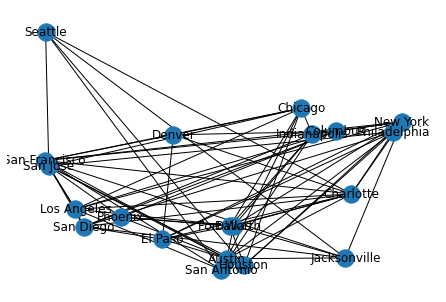

In [15]:
H = nx.Graph()
for i in range(20):
    H.add_node(data.iloc[i]['NAME'], pos=(data.iloc[i]['X'], data.iloc[i]['Y']))
for j in range(20):
    for k in range(20):
        random_num = random.randint(0,100)
        if random_num < 40:
            if k > j:
                H.add_edge(data.iloc[j]['NAME'], data.iloc[k]['NAME'])
nx.draw(H, nx.get_node_attributes(H, 'pos'),with_labels=True) 

## totalDistance() uses BFS on the above graph to distance traveled in each city, total distance, and total fuel cost.

In [20]:
def totalDistance(H):
    R = 6371 
    p = math.pi / 180 #p and R are used as variables to calculate distance
    mpg = 65
    cost_per_gallon = 1.70 # mpg and cost per gallon are estimates found online
    total_distance = 0
    for node in H.nodes():
        list_of_neighbors = list(H.neighbors(node))
        city_distance = 0
        for i in list_of_neighbors:
            node_long = data.loc[(data['NAME'] == node), "X"].tolist()
            node_lat = data.loc[(data['NAME'] == node), "Y"].tolist()
            i_long = data.loc[(data['NAME'] == i), "X"].tolist()
            i_lat = data.loc[(data['NAME'] == i), "Y"].tolist()
            dlat = node_lat[0] - i_lat[0]
            dlon = node_long[0] - i_long[0]
            a = (.5) - math.cos(dlat*p)/2 + (math.cos(i_lat[0]*p)* math.cos(node_lat[0]*p)) * (1-math.cos(dlon*p))/2
            distance = (R *2 * math.asin(math.sqrt(a))) *.62137119
            city_distance += distance
            total_distance += distance
            cost = (total_distance/mpg) * cost_per_gallon
            
        print("There are", len(list_of_neighbors), "flights going out of",node, "this week. The destinations are:",list_of_neighbors, ". A total of ", len(list_of_neighbors), "planes will be needed.")
        print("The total distance of flights traveling out of", node, "is expected to be:",round(city_distance, 2), "miles")
        
        print()
    return(print("The total distance of flights for this week is:", round(total_distance, 2), "miles. For a total cost of: $", round(cost,2), "in fuel"))
totalDistance(H)

There are 9 flights going out of New York this week. The destinations are: ['Los Angeles', 'Houston', 'Dallas', 'Jacksonville', 'Columbus', 'San Francisco', 'Indianapolis', 'Charlotte', 'El Paso'] . A total of  9 planes will be needed.
The total distance of flights traveling out of New York is expected to be: 12185.61 miles

There are 9 flights going out of Los Angeles this week. The destinations are: ['New York', 'Chicago', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Columbus', 'San Francisco', 'Charlotte'] . A total of  9 planes will be needed.
The total distance of flights traveling out of Los Angeles is expected to be: 11487.86 miles

There are 8 flights going out of Chicago this week. The destinations are: ['Los Angeles', 'Houston', 'San Antonio', 'San Jose', 'San Francisco', 'Indianapolis', 'Fort Worth', 'Denver'] . A total of  8 planes will be needed.
The total distance of flights traveling out of Chicago is expected to be: 9306.02 miles

There are 7 flights going out of 

## findDistace() gives the straight line distance from any two cities. 

In [21]:
def findDistance(cityA, cityB):
    R = 6371
    p = math.pi / 180
    mpg = 65
    cost_per_gallon = 1.70
    
    cityA_long = city.loc[city['NAME'] == cityA, "X"].tolist()    
    cityA_lat = city.loc[city['NAME'] == cityA, "Y"].tolist()
    cityB_long = city.loc[city['NAME'] == cityB, "X"].tolist()
    cityB_lat = city.loc[city['NAME'] == cityB, "Y"].tolist()
    
    dlat = cityA_lat[0] - cityB_lat[0]
    dlon = cityA_long[0] - cityB_long[0]
    a = (.5) - math.cos(dlat*p)/2 + (math.cos(cityB_lat[0]*p)* math.cos(cityA_lat[0]*p)) * (1-math.cos(dlon*p))/2
    distance = (R *2 * math.asin(math.sqrt(a))) *.62137119
    
    cost = (distance/mpg) * cost_per_gallon
    print("The total gas required to fly between", cityA, "and", cityB, "is estimated to be: $",round(cost,2), ".")
    return(print("The distance between", cityA, "and", cityB, "is",round(distance,2), "miles."))
    
findDistance('Grand Rapids', 'Salt Lake City')

The total gas required to fly between Grand Rapids and Salt Lake City is estimated to be: $ 35.38 .
The distance between Grand Rapids and Salt Lake City is 1352.74 miles.
